In [269]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kanee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Task 1 - Describe the dataset

The data is saved in a CSV file, `reviews.csv`. We can read this file and display the first few rows to understand its structure and contents.

In [270]:
reviews = pd.read_csv("reviews.csv")
reviews.head()

,review_id,review_url,location_id,hotel_name,city,timestamp,rating,title,text,travel_date,username,value_rating,room_rating,location_rating,cleanliness_rating,service_rating,sleep_rating
0,1016464488,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-07-04T05:58:58Z,1,not a good stay,Found lighters in the toilet paper rolls in a ...,2025-06-30,Curious04015869441,NaN,NaN,NaN,NaN,NaN,NaN
1,1016435128,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-07-04T01:38:54Z,5,Definitely recommend!,The hotel is just excellent! The food is so go...,2025-07-31,742saltanata,5.0,5.0,5.0,5.0,5.0,5.0
2,1016307864,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-07-03T05:15:10Z,5,Wonderful stay,Comfortable stay..cooperative staff..fast serv...,2025-07-31,847shivanig,5.0,5.0,5.0,5.0,4.0,5.0
3,1016165618,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-07-02T06:36:14Z,5,My favorite 4+ star hotel in Colombo,"We live in New York area, but my spouse is fam...",2025-07-31,jacksF8984QN,NaN,NaN,NaN,NaN,NaN,NaN
4,1015472232,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-06-28T00:50:47Z,5,Excellent food and stay,Excellent food especially indian corner lot of...,2025-06-30,Vinayaksahni,5.0,5.0,5.0,5.0,5.0,5.0


### 1.1. Nature of the data

As it can be seen, the dataset contains a collection of hotel reviews with the following columns:
- `review_id`: Unique identifier for each review (as provided by Trip Advisor).
- `review_url`: URL of the review on Trip Advisor.
- `location_id`: Unique identifier for the hotel (as provided by Trip Advisor).
- `hotel_name`: Name of the hotel.
- `city`: City where the hotel is located.
- `timestamp`: Date and time when the review was posted.
- `rating`: Rating given by the reviewer (1 to 5 stars).
- `title`: Title of the review.
- `text`: Full text of the review.
- `travel_date`: Date when the reviewer stayed at the hotel.
- `value_rating`: Rating for the value for money.
- `room_rating`: Rating for the room.
- `location_rating`: Rating for the location.
- `cleanliness_rating`: Rating for the cleanliness.
- `service_rating`: Rating for the service.
- `sleep_rating`: Rating for the sleep quality.

We can check the shape of the data to understand how many rows and columns are present in the dataset.

In [271]:
reviews.shape

(7367, 17)

As seen above, the dataset contains 7,367 reviews, with each review having 15 columns.

We can also check how many unique values are present in each column to understand the nature of the data.

In [272]:
reviews.nunique()

review_id             5186
review_url            5186
location_id            566
hotel_name             563
city                   161
timestamp             5186
rating                   5
title                 4691
text                  5186
travel_date            181
username              5019
value_rating             5
room_rating              5
location_rating          5
cleanliness_rating       5
service_rating           5
sleep_rating             5
dtype: int64

We can see that for most columns, there are exactly 5,186 unique columns, including for `review_id` this indicates that our dataset contains a significant number of duplicate reviews.

Aside from that, we can infer some additional information from the above.
- This dataset comprises reviews from 566 different hotels, each with its own unique `location_id`.
- There are 161 distinct cities represented in the dataset, each with its own unique `city` name.
- There are only 5 unique values for `rating`, which indicates that the ratings are on a 1 to 5 scale.
- There are 5,019 unique values for `username`, indicating that as many users have contributed multiple reviews.

### 1.2. Removing duplicates

Since the dataset contains duplicate reviews, we can remove them to ensure that each review is unique.

In [273]:
reviews = reviews.drop_duplicates()
reviews.shape

(5186, 17)

After removing duplicates, we have 5,186 unique reviews in the dataset.

### 1.2 Distribution of reviews by hotel

First, we can check the number of unique hotels in the dataset.

In [274]:
reviews["location_id"].unique().shape[0]

566

Next, we can visualize the number of reviews per hotel to understand the distribution of reviews across different hotels. We can use a histogram to visualize this distribution.

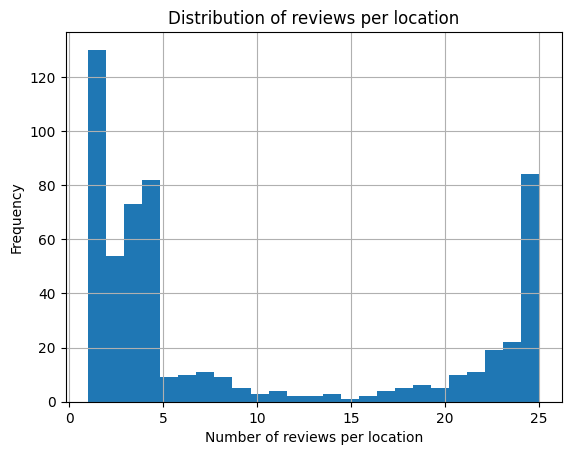

In [275]:
reviews["location_id"].value_counts().hist(bins=25)

plt.xlabel("Number of reviews per location")
plt.ylabel("Frequency")
plt.title("Distribution of reviews per location")
plt.show()

Here, we can see that most hotels have a small number of reviews.  Most hotels have between 1 and 5 reviews. This may due to a quirk of the Trip Advisor API, which only returns the 5 reviews per API request. You would need to make additional API calls with a different offset to get more reviews for each hotel. 

We can see a sharp drop-off after 5 reviews. This also may have something do with the API.

Finally, we can see a sharp spike at 25 reviews, and no hotels have more than 25 reviews. This is likely due to the API returning a maximum of 25 reviews per hotel.

### 1.3. Distribution of reviews by city

First, we can check the number of unique cities in the dataset.

In [276]:
reviews["city"].unique().shape[0]

161

Next, we can visualize the number of reviews per city to understand the distribution of reviews across different cities. We can use a histogram to visualize this distribution.

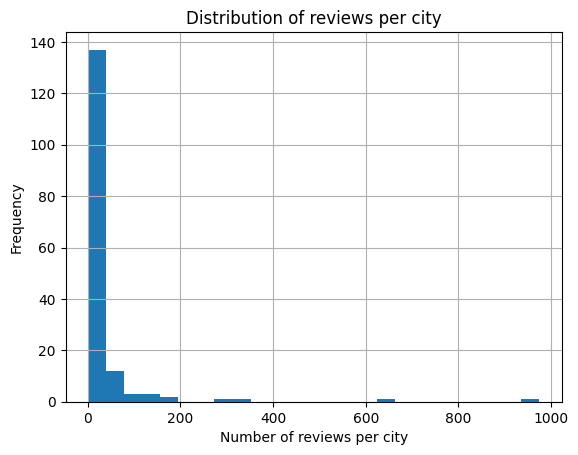

In [277]:
reviews["city"].value_counts().hist(bins=25)

plt.xlabel("Number of reviews per city")
plt.ylabel("Frequency")
plt.title("Distribution of reviews per city")
plt.show()

Here once again, we see a very unbalanced distribution of reviews across cities. Most cities have a small number of reviews, with a few cities having a large number of reviews. 

This can be explained by the fact that a few cities are more tourist/business hotspots. And a majority of the hotels as well as visitos are located in these cities.

We can also visualize the top 10 cities with the most reviews to get a better understanding of the distribution.

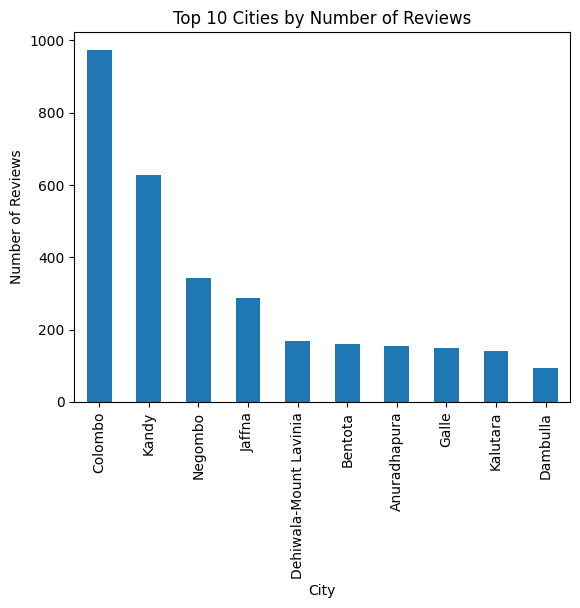

In [278]:
top_cities = reviews["city"].value_counts().head(10)

top_cities.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Cities by Number of Reviews")
plt.show()

Here, we can see the most populous cities in Sri Lanka are also the ones with the most reviews. Another factor affecting this may be how the data was collected using the API. 

As there were several interruptions/issues with the API, it is possible that the data collection was not uniform across all cities.

And now, we can visualize the number of unique hotels in each city to understand the distribution of hotels across different cities.

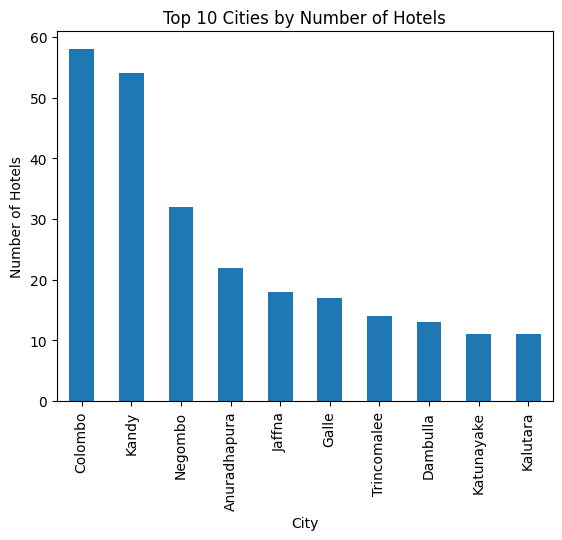

In [279]:
hotels_per_city = reviews.groupby("city")["location_id"].nunique().sort_values(ascending=False)
hotels_per_city.head(10).plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Number of Hotels")
plt.title("Top 10 Cities by Number of Hotels")
plt.show()

This seems to follow the same pattern as the number of reviews per city. The most populous cities have the most hotels.

### 1.4. Distribution of ratings
We can now move onto checking the distribution of ratings in the dataset.

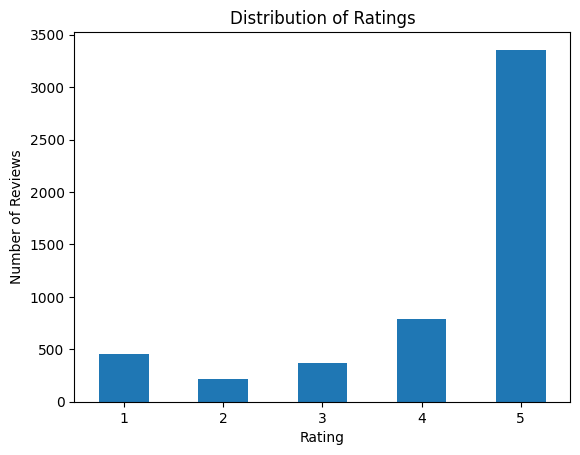

In [280]:
reviews["rating"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Ratings")
plt.xticks(rotation=0)
plt.show()

As expected, it seems that most reviews are positive, with a majority of the reviews having a rating of 4 or 5 stars. This can be explained by the fact that people are more likely to leave a review if they had a positive experience.

But also, we do see a significant number of 1-star reviews, with a very low number of 2-star reviews. This may indicate that people are more likely to leave a review if they had a very positive or very negative experience, rather than a neutral experience.

We can also draw a boxplot to visualize the distribution of ratings and identify any potential outliers.

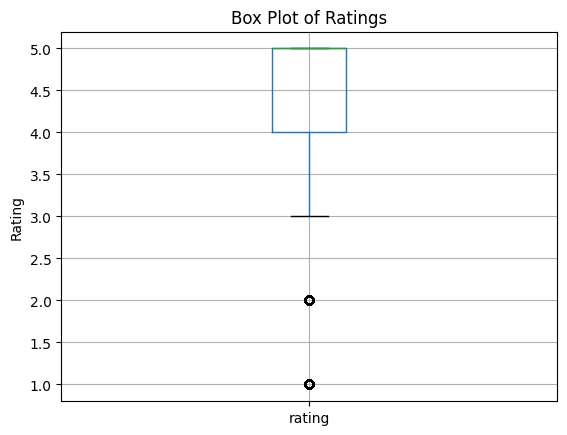

In [281]:
reviews.boxplot(column="rating")
plt.ylabel("Rating")
plt.title("Box Plot of Ratings")
plt.show()

We can also visualize the distribution of the average rating by hotel. This will help us understand how the ratings are distributed across different hotels.

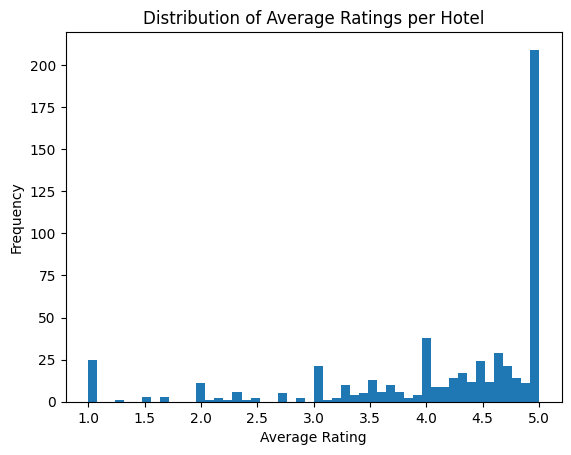

In [282]:
avg_rating_per_hotel = reviews.groupby("location_id")["rating"].mean().sort_values(ascending=False)

avg_rating_per_hotel.plot(kind='hist', bins=50)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Average Ratings per Hotel")
plt.show()

Here, we see that a majority of hotels have a 5-star rating. This is unexpected, as we would expect a more balanced distribution of ratings across hotels. This may be due to the fact that the data was collected using the API, which may have a bias towards reviews with higher ratings.

We also see peaks at whole numbers. This may be because most hotels have one, two, or a very small number of reviews, and thus the average rating is likely to be a whole number.

We can do the same to analyze the distribution of average ratings by city. This will help us understand how the ratings are distributed across different cities.

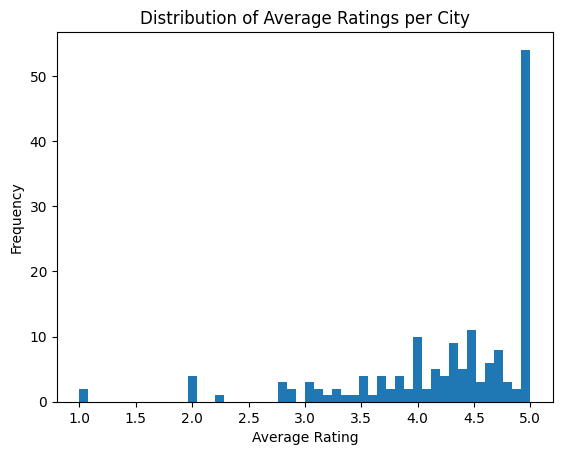

In [283]:
# Plot average rating for city, plot histogram of the average ratings
avg_rating_per_city = reviews.groupby("city")["rating"].mean().sort_values(ascending=False)
# histogram of average ratings
avg_rating_per_city.plot(kind='hist', bins=50)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Average Ratings per City")
plt.show()

While here, we do see a similar pattern as the average ratings by hotel, we do see a more balanced distribution of ratings across cities. This may be due to the fact that there are more hotels in each city, and thus the average rating is less likely to be skewed by a small number of reviews.

### 1.5. Cleaning of text data

Now that we have described the dataset, we can move on to cleaning the text data. The text data consists of the `title` and `text` columns, which contain the title and full text of the review, respectively.

First, we can check the content of `title` column in the first few rows to understand its structure and contents.

In [284]:
reviews["title"].head(10)

0                         not a good stay
1                   Definitely recommend!
2                          Wonderful stay
3    My favorite 4+ star hotel in Colombo
4                 Excellent food and stay
5                             Outstanding
6                               I like it
7            Everything  is wonderful 😁😁😁
8                        Great experience
9          Very good and highly recommend
Name: title, dtype: object

We notice some flaws in this data which will affect us later on when we try to analyze the text data
- The titles are not in lowercase, which may affect our analysis later on.
- The titles contain punctuation, special characters, and emoji, which would affect our analysis.
- There is unnecessary whitespace in the titles, which may affect our analysis later on.

Our goal is to clean the text data so that it is in a consistent format, which will make it easier to analyze later on.

In [285]:
# convert title to lowercase
reviews["title"] = reviews["title"].str.lower()

# remove all non-alphanumeric
reviews["title"] = reviews["title"].str.replace(r'[^\w\s]', '', regex=True)

# remove unnecessary whitespace
reviews["title"] = reviews["title"].str.strip()
reviews['title'] = reviews['title'].str.replace(r'\s+', ' ', regex=True)

reviews["title"].head(10)

0                        not a good stay
1                   definitely recommend
2                         wonderful stay
3    my favorite 4 star hotel in colombo
4                excellent food and stay
5                            outstanding
6                              i like it
7                everything is wonderful
8                       great experience
9         very good and highly recommend
Name: title, dtype: object

And we can do the same for the `text` columns

In [286]:
# convert text to lowercase
reviews["text"] = reviews["text"].str.lower()

# remove all non-alphanumeric
reviews["text"] = reviews["text"].str.replace(r'[^\w\s]', '', regex=True)

# remove unnecessary whitespace
reviews["text"] = reviews["text"].str.strip()
reviews['text'] = reviews['text'].str.replace(r'\s+', ' ', regex=True)

reviews["text"].head(10)

0    found lighters in the toilet paper rolls in a ...
1    the hotel is just excellent the food is so goo...
2    comfortable staycooperative stafffast service ...
3    we live in new york area but my spouse is fami...
4    excellent food especially indian corner lot of...
5    spotless and immaculate premises the room is s...
6    house keeping and also respition i good and ni...
7    everything was amazing the breakfast and lunch...
8    we were there last week with our family and it...
9    very accommodating staff and lovely restaurant...
Name: text, dtype: object

Since the goal is to analyze the text data, we can combine the `title` and `text` columns into a single column called `review`. This will make it easier to analyze the text data later on.

In [287]:
# combine title and text
reviews["review"] = reviews["title"] + " " + reviews["text"]
reviews["review"].head(10)

0    not a good stay found lighters in the toilet p...
1    definitely recommend the hotel is just excelle...
2    wonderful stay comfortable staycooperative sta...
3    my favorite 4 star hotel in colombo we live in...
4    excellent food and stay excellent food especia...
5    outstanding spotless and immaculate premises t...
6    i like it house keeping and also respition i g...
7    everything is wonderful everything was amazing...
8    great experience we were there last week with ...
9    very good and highly recommend very accommodat...
Name: review, dtype: object

### 1.6. Analyzing the corpus

In [288]:
# total number of words
reviews["review"].str.split().str.len().sum()

np.int64(481190)

We can see that there are 481,190 words in the dataset.

In [289]:
# total number of unique words
reviews["review"].str.split().explode().nunique()

18137

There are 18,134 unique words in the corpus

Next we can visualize the distribution of review lengths to understand how long the reviews are. This will help us understand the nature of the reviews and how they vary in length.

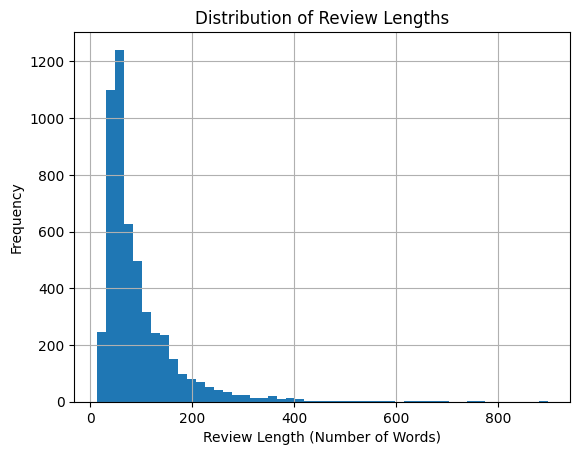

In [290]:
# distribution of review lengths
reviews["review_length"] = reviews["review"].str.split().str.len()
reviews["review_length"].hist(bins=50)
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

As expected. this distribution is highly skewed, with most reviews being relatively short. This is expected as most people would not take the time and make the effort to write long, detailed reviews.

Another interesting analysis would be to visualize the most frequent words in the reviews. This will help us understand the common themes and topics discussed in the reviews.

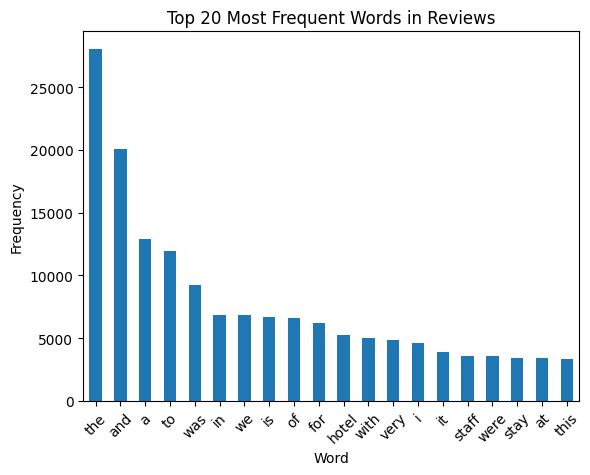

In [291]:
word_counts = reviews["review"].str.split().explode().value_counts()
word_counts.head(20).plot(kind='bar')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xticks(rotation=45)
plt.show()

Here we run into a problem. The most frequent words in the reviews are common stopwords such as "the", "and", "to", etc. These words do not provide much information about the content of the reviews and can be considered noise in our analysis.
To address this, we can remove stopwords from the reviews.

In [292]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])
reviews["review"] = reviews["review"].apply(remove_stopwords)
reviews["review"].head(10)

0    good stay found lighters toilet paper rolls no...
1    definitely recommend hotel excellent food good...
2    wonderful stay comfortable staycooperative sta...
3    favorite 4 star hotel colombo live new york ar...
4    excellent food stay excellent food especially ...
5    outstanding spotless immaculate premises room ...
6    like house keeping also respition good nice li...
7    everything wonderful everything amazing breakf...
8    great experience last week family great experi...
9    good highly recommend accommodating staff love...
Name: review, dtype: object

In [293]:
reviews["review"].str.split().str.len().sum()

np.int64(263408)

After removing stopwords, we can see that the total number of words in the dataset has decreased significantly.

In [294]:
reviews["review"].str.split().explode().nunique()

17998

However, the number of unique words in the corpus has not changed significantly.

We can now once again visualize the top 20 most frequent words in the reviews after removing stopwords.

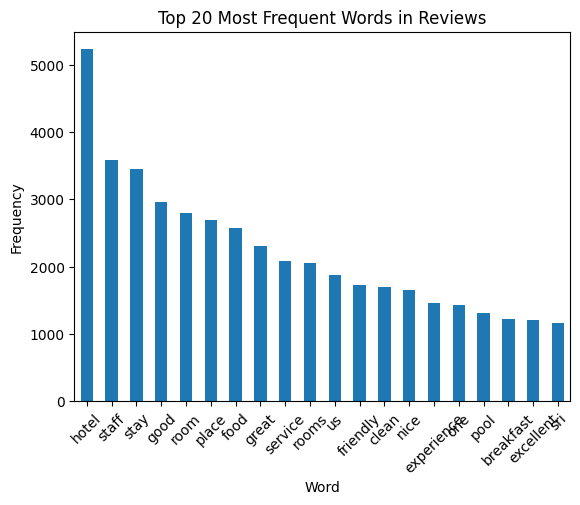

In [295]:
word_counts = reviews["review"].str.split().explode().value_counts()
word_counts.head(20).plot(kind='bar')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xticks(rotation=45)
plt.show()

Now, we can see that the most frequent words in the reviews are more meaningful and provide more information about the content of the reviews.

We can also check the most common bi-grams and tri-grams in the reviews to understand the common phrases used in the reviews.

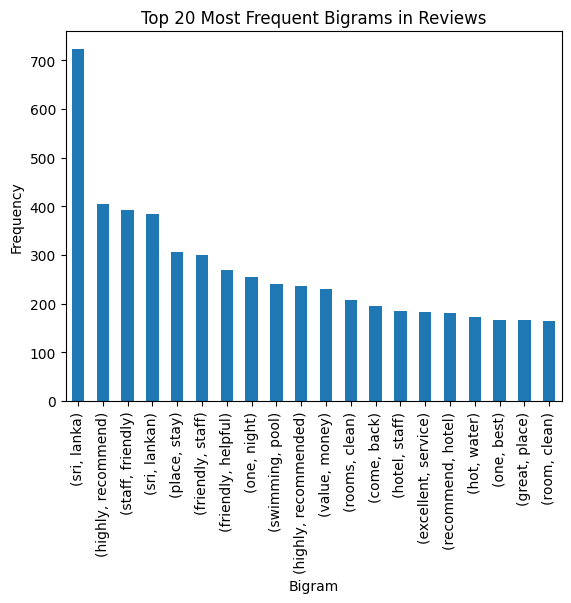

In [302]:
def get_ngrams(text, n):
    words = word_tokenize(text)
    return list(ngrams(words, n))

bigrams = reviews["review"].apply(lambda x: get_ngrams(x, 2)).explode().value_counts()
bigrams.head(20).plot(kind='bar')
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Bigrams in Reviews")
plt.xticks(rotation=90)
plt.show()

Here we can see some clear terms that is related to the reviews.

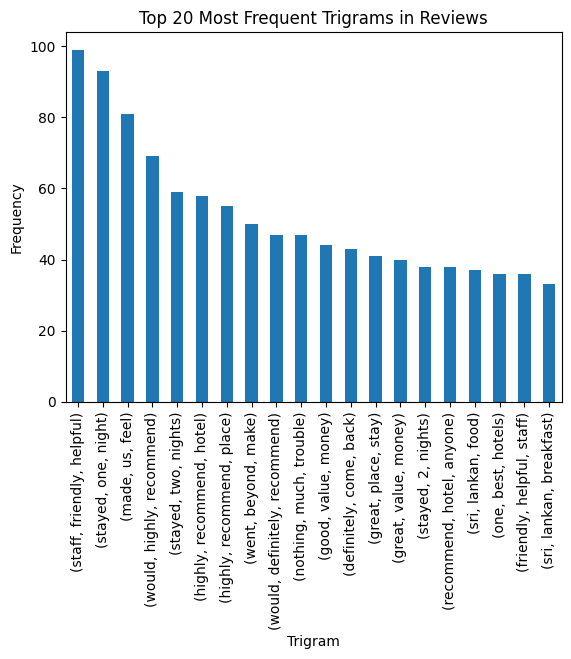

In [303]:
trigrams = reviews["review"].apply(lambda x: get_ngrams(x, 3)).explode().value_counts()
trigrams.head(20).plot(kind='bar')
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Trigrams in Reviews")
plt.xticks(rotation=90)
plt.show()

Again we see some common terms we would expect to see in a review. These phrases can provide more context and meaning to the reviews, and can be useful for further analysis.

Finally, we save this cleaned dataset to a new CSV file for further analysis.

In [297]:
# save the cleaned reviews to a new csv file
reviews.to_csv("cleaned_reviews.csv", index=False)